In [131]:
import pickle as pkl
import torch
import os
import torch, lcasr
import matplotlib.pyplot as plt

In [132]:
def get_data(prefix, base_path='./'):
    in_dir = os.listdir(base_path)
    in_dir = [f for f in in_dir if f.startswith(prefix)]
    in_dir = sorted(in_dir)
    data = []
    for f in in_dir:
        with open(base_path + f, 'rb') as file:
            data.append(pkl.load(file))
    return data

----- 
AWMC EVALS
-----

In [148]:
print('AWMC')
tedlium_test = get_data('ted_test', base_path='./awmc/')
print(len(tedlium_test))
test_wer = [d['wer'] for d in tedlium_test]
print(f'Tedlium (Test) WER: {sum(test_wer)/len(test_wer)*100}')

chime6_test = get_data('chime6_test', base_path='./awmc/')
test_wer = [d['wer'] for d in chime6_test]
print(f'Chime6 (Test) WER: {sum(test_wer)/len(test_wer)*100}')
chime6_dev = get_data('chime6_dev', base_path='./awmc/')
dev_wer = [d['wer'] for d in chime6_dev]
print(f'Chime6 (Dev) WER: {sum(dev_wer)/len(dev_wer)*100}')

AWMC
3
Tedlium (Test) WER: 6.213204166420541
Chime6 (Test) WER: 88.86715231269339
Chime6 (Dev) WER: 85.34408326562367


In [156]:
print('AWMC AUG')
earnings_test = get_data('earnings22_test', base_path='./awmc_aug/')
print(len(earnings_test))
test_wer = [d['wer'] for d in earnings_test]
print(f'Earnings22 (Test) WER: {sum(test_wer)/len(test_wer)*100}')

tedlium_test = get_data('ted_test', base_path='./awmc_aug/')
print(len(tedlium_test))
test_wer = [d['wer'] for d in tedlium_test]
print(f'Tedlium (Test) WER: {sum(test_wer)/len(test_wer)*100}')


AWMC AUG
3
Earnings22 (Test) WER: 15.742499438351409
2
Tedlium (Test) WER: 5.954279638490164


---------
per epoch eval earnings-22
---------

['epoch-0-earnings22-test_1.pkl', 'epoch-1-earnings22-test_1.pkl', 'epoch-5-earnings22-test_1.pkl', 'epoch-4-earnings22-test_1.pkl', 'epoch-3-earnings22-test_1.pkl', 'epoch-2-earnings22-test_1.pkl']


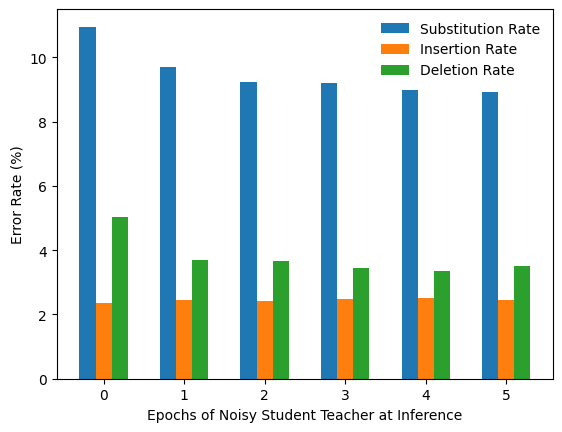

In [157]:
print(os.listdir("./per_epoch_eval"))
epochs = list(set(sorted([int(el.split('-')[1]) for  el in os.listdir("./per_epoch_eval")])))
data = {}
for e in epochs:
    data[e] = get_data(f'epoch-{e}-earnings22-test', base_path='./per_epoch_eval/')

# plt.plot(list(epochs), [data[e][0]['sub_rate']*100 for e in epochs], marker='o', markersize=3, label='Substitution Rate')
# plt.plot(list(epochs), [data[e][0]['ins_rate']*100 for e in epochs], marker='o', markersize=3, label='Insertion Rate')
# plt.plot(list(epochs), [data[e][0]['del_rate']*100 for e in epochs], marker='o', markersize=3, label='Deletion Rate')

# same as above but as a side-by-side bar plot
bar_width = 0.2  # adjust the width of each bar
import numpy as np
plt.bar(np.array(epochs) - bar_width, [data[e][0]['sub_rate']*100 for e in epochs], width=bar_width, label='SubstitutionS') 
plt.bar(epochs, [data[e][0]['ins_rate']*100 for e in epochs], width=bar_width, label='Insertions')
plt.bar(np.array(epochs) + bar_width, [data[e][0]['del_rate']*100 for e in epochs], width=bar_width, label='Deletions')


plt.xticks(epochs)
# legend position, also set so its transparent
plt.legend(loc='upper right', framealpha=0.0)

plt.xlabel('Epochs of Noisy Student Teacher at Inference')
plt.ylabel('Error Rate (%)')


# set xlabel ticks
plt.xticks(list(epochs))
#plt.xlim(epochs[0]-0.05, epochs[-1]+0.05)

plt.savefig('error_rates_per_epoch_earnings22.png', bbox_inches='tight') 

plt.show()


=========
NST EVALS
=========

In [136]:
epochs  = set([el.split("_")[1].split('-')[0] for el in os.listdir("./earningsNST/")])

dev_results = {'0':23.9}
test_results = {'0':18.3}
for epoch in epochs:
    for split in ['dev', 'test']:
        data = get_data(f'earnings22_{epoch}-{split}', base_path='./earningsNST/')
        if len(data) > 0 :
            if split == 'dev':
                dev_results[epoch] = data[0]['wer'] * 100
            else:
                test_results[epoch] = data[0]['wer'] *100

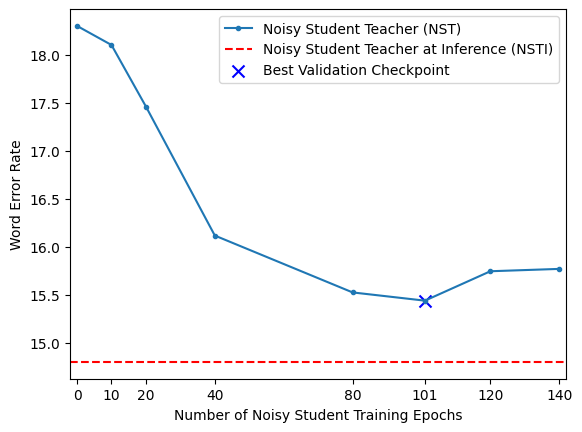

In [137]:
epochs = sorted([int(k) for k in test_results.keys() if k not in ["100", "5"]])

# make x axis log scale (base 2) on the following line

plt.plot(epochs, [test_results[str(e)] for e in epochs], label='Noisy Student Teacher (NST)', marker='o', markersize=3)
plt.xlabel('Number of Noisy Student Training Epochs')
plt.ylabel('Word Error Rate')
plt.xticks(epochs)

# Add a horizontal line at y=0.5
plt.axhline(y=14.8, color='red', linestyle='--', label='Noisy Student Teacher at Inference (NSTI)')

# Set the x-axis limits without padding
plt.xlim(epochs[0]-2, epochs[-1]+2)

# Add a point and annotate it with text
best_epoch = 101  # Replace with the actual best epoch
best_wer = test_results[str(best_epoch)]  # Replace with the actual best WER
plt.scatter(best_epoch, best_wer, color='blue', label='Best Validation Checkpoint', marker='x', s=75)

plt.legend()

plt.savefig('earnings_nst.pdf', bbox_inches='tight') 

# Show the plot
plt.show()




=========
Encoder Decoder Evals
=========

In [146]:
for dataset in ['earnings22', 'tedlium', 'chime6']:
    for split in ['dev', 'test']:
        if dataset == 'chime6' and split == 'test': continue
        data = get_data(f'{dataset}-{split}', base_path='./enc_dec_normal_eval/')
        print(f"{dataset} {split}: {data[0]['wer']*100}")
        


print(f"rev16: {get_data('rev16-test', base_path='./enc_dec_normal_eval/')[0]['wer']*100}")

earnings22 dev: 38.79325448970653
earnings22 test: 31.33794906357862
tedlium dev: 12.37979440698574
tedlium test: 11.589580010632643
chime6 dev: 79.4493431707756
rev16: 19.974161658147505
